Exploratory Data Analysis (EDA)
Identify and remove unnecessary columns
Detect and handle missing values
Find features with only a single unique value
Analyze categorical features
Examine the distribution of categorical features
Investigate the relationship between categorical features and the target variable
Explore numerical features
Identify discrete numerical features
Assess the relationship between discrete numerical features and the target variable
Identify continuous numerical features
Analyze the distribution of continuous numerical features
Evaluate the relationship between continuous numerical features and the target variable
Detect outliers in numerical features
Examine correlations between numerical features
Generate pair plots for visual analysis
Determine if the dataset is balanced based on target class distribution in classification problems

In [1]:
import pandas as pd

# Read the semicolon-separated CSV file
df = pd.read_csv(r'bank-full.csv', sep=';')

# Write the DataFrame to a new CSV file with commas as the delimiter (default)
df.to_csv('bank-full-converted.csv', index=False)

print("Converted file saved as 'bank-full-converted.csv'.")


Converted file saved as 'bank-full-converted.csv'.


In [2]:
import pandas as pd
import numpy as np

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('bank-full-converted.csv')

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nData Type:")
print(df.dtypes)
print("\First 5 column:")
print(df.head(5))
# check the df structe
print("\nInfo:")
df.info()


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Data Type:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
\First 5 column:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar 

In [4]:
# find number of rows and column
print("\nShape:")
print(df.shape)

# describe df numerical columns
print("\nSimple Descriptive:")
df.describe()


Shape:
(45211, 17)

Simple Descriptive:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Optionally, drop duplicates:
print('Duplicated dropped!')
df = df.drop_duplicates()

Number of duplicate rows: 0
Duplicated dropped!


In [6]:
# find the unique values from categorical features
print("\nfind the unique values from categorical features:")
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())


find the unique values from categorical features:
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [7]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [8]:
print("Unique Values:")
for column in df.columns:
    print(column,df[column].nunique())

Unique Values:
age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [9]:
print("Categorical features")
#categorical_features=[feature for feature in df.columns.tolist() if ((df[feature].dtypes=='O') & (feature not in ['y = deposit']))]

#categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

#deposit
target = 'y'
categorical_features = [col for col in df.select_dtypes(include=['object', 'category']).columns if col.strip() != target]
print(categorical_features)

#Binary categories handling
binary_categorical_columns = [col for col in categorical_features if df[col].nunique() == 2]
non_binary_categorical_columns = [col for col in categorical_features if col not in binary_categorical_columns]
print("Binary categories")
print(binary_categorical_columns)
print("Non-binary categories")
print(non_binary_categorical_columns)

Categorical features
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Binary categories
['default', 'housing', 'loan']
Non-binary categories
['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [10]:
# Initialize a dictionary to store counts
unknown_counts = {}

# Loop through each categorical column and count occurrences of 'unknown'
for col in categorical_features:
    # Convert to lowercase to ensure matching 'unknown' irrespective of case
    count = df[col].str.lower().eq("unknown").sum()
    unknown_counts[col] = count

# Display the results as a DataFrame for clarity
unknown_df = pd.DataFrame.from_dict(unknown_counts, orient='index', columns=['Unknown Count'])
print(unknown_df)

           Unknown Count
job                  288
marital                0
education           1857
default                0
housing                0
loan                   0
contact            13020
month                  0
poutcome           36959


In [11]:
# shows features numbers of categories
for feature in categorical_features:
    print(f"The feature is {feature} and the number of categories is {df[feature].nunique()}.")
print()  
print("Summary table")
summary = pd.DataFrame({
    'Feature': categorical_features,
    'Num_Categories': [df[feature].nunique() for feature in categorical_features]
})
print(summary)


The feature is job and the number of categories is 12.
The feature is marital and the number of categories is 3.
The feature is education and the number of categories is 4.
The feature is default and the number of categories is 2.
The feature is housing and the number of categories is 2.
The feature is loan and the number of categories is 2.
The feature is contact and the number of categories is 3.
The feature is month and the number of categories is 12.
The feature is poutcome and the number of categories is 4.

Summary table
     Feature  Num_Categories
0        job              12
1    marital               3
2  education               4
3    default               2
4    housing               2
5       loan               2
6    contact               3
7      month              12
8   poutcome               4


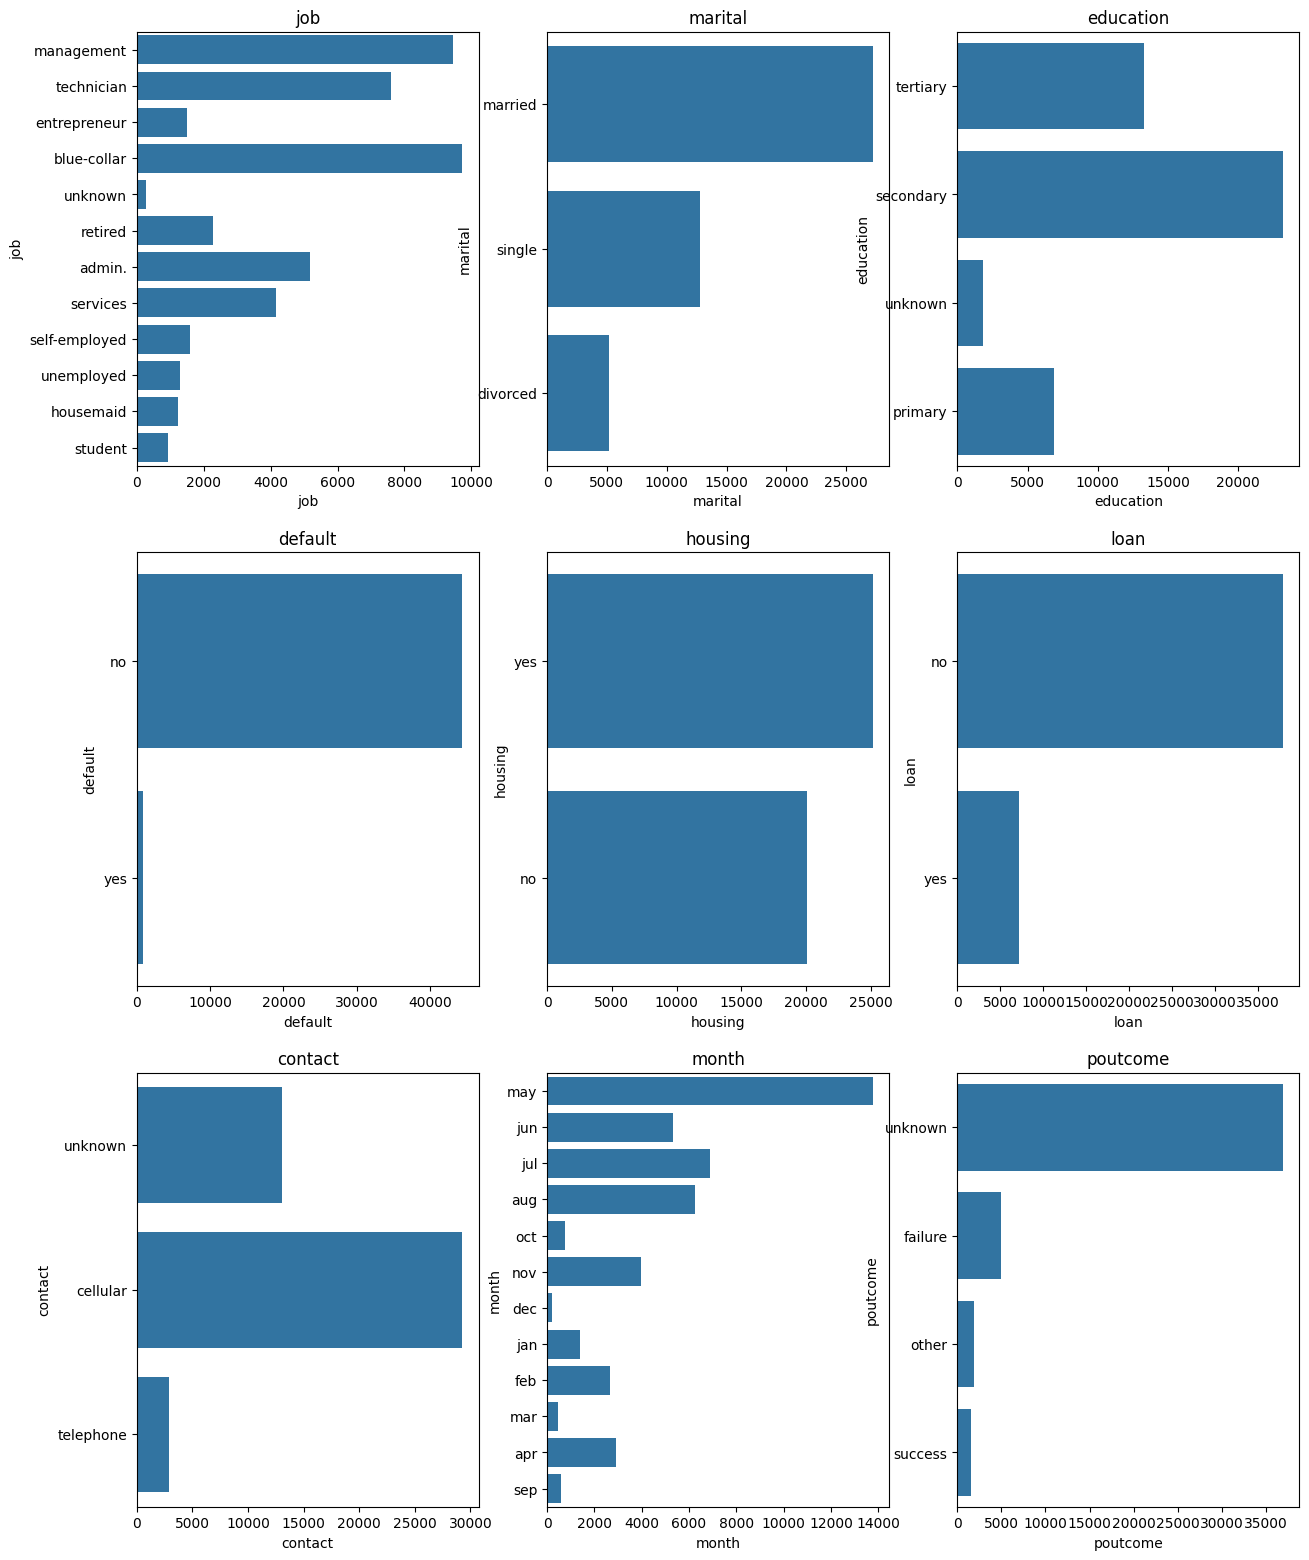

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

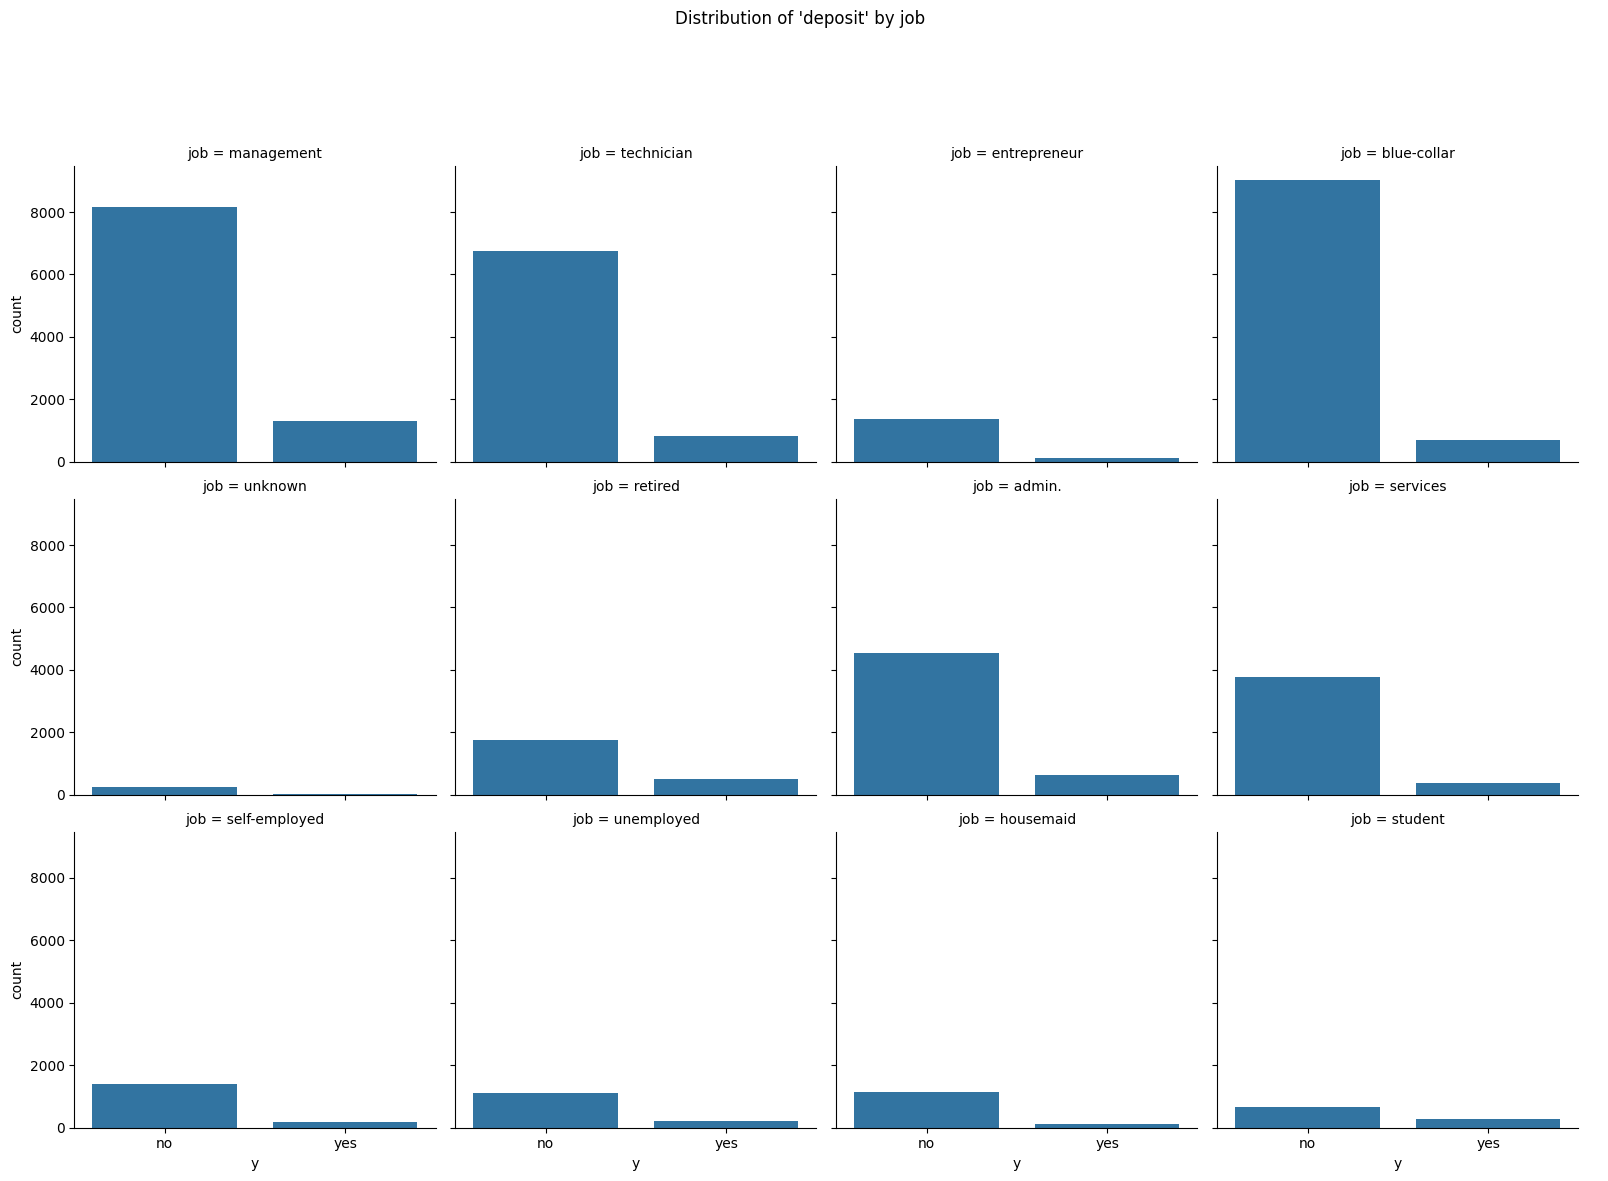

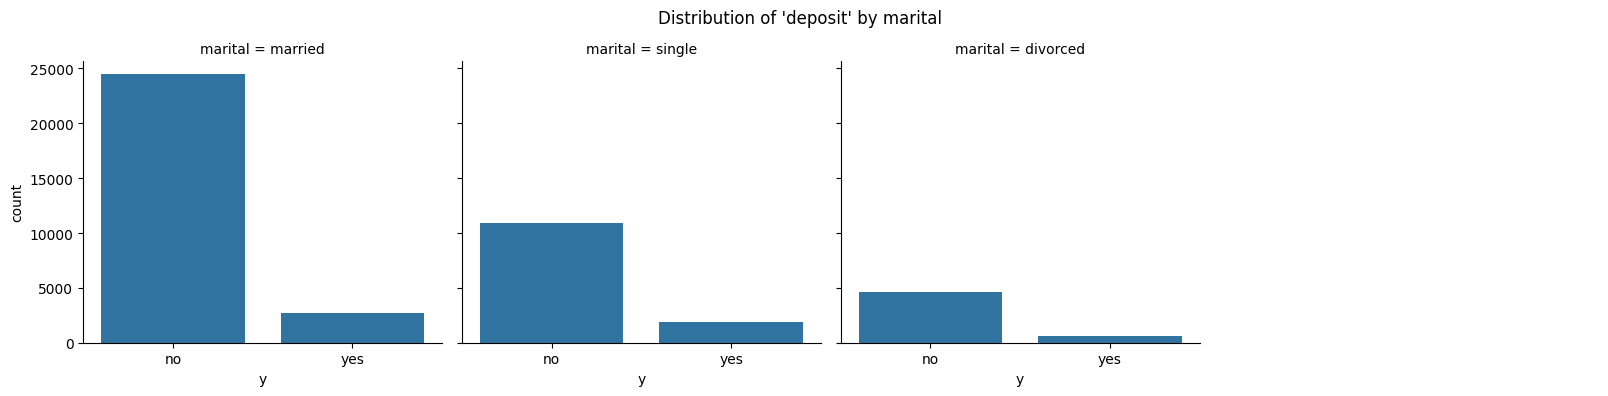

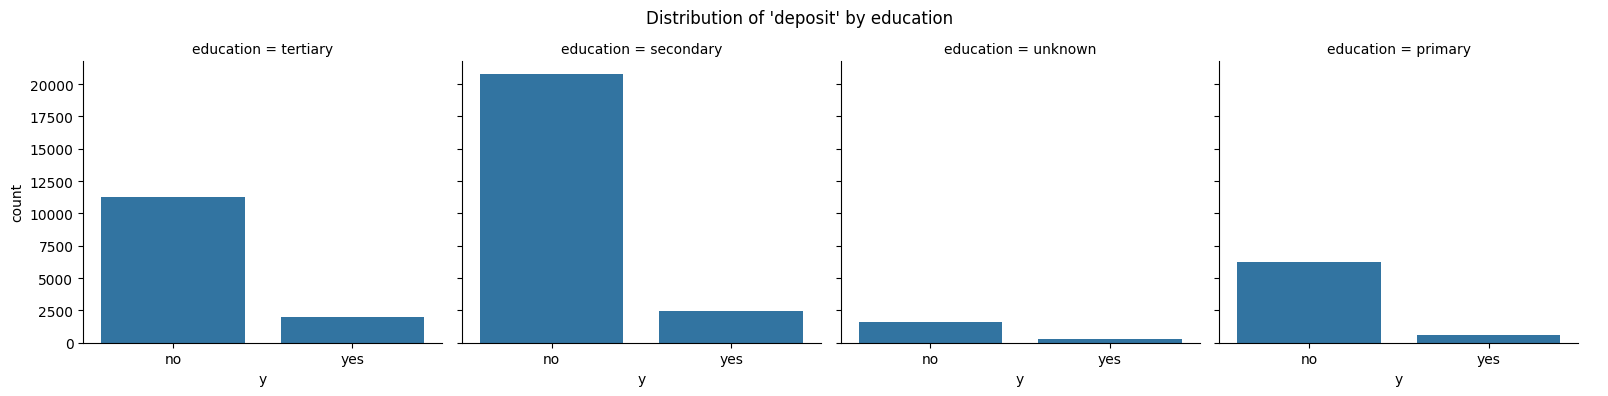

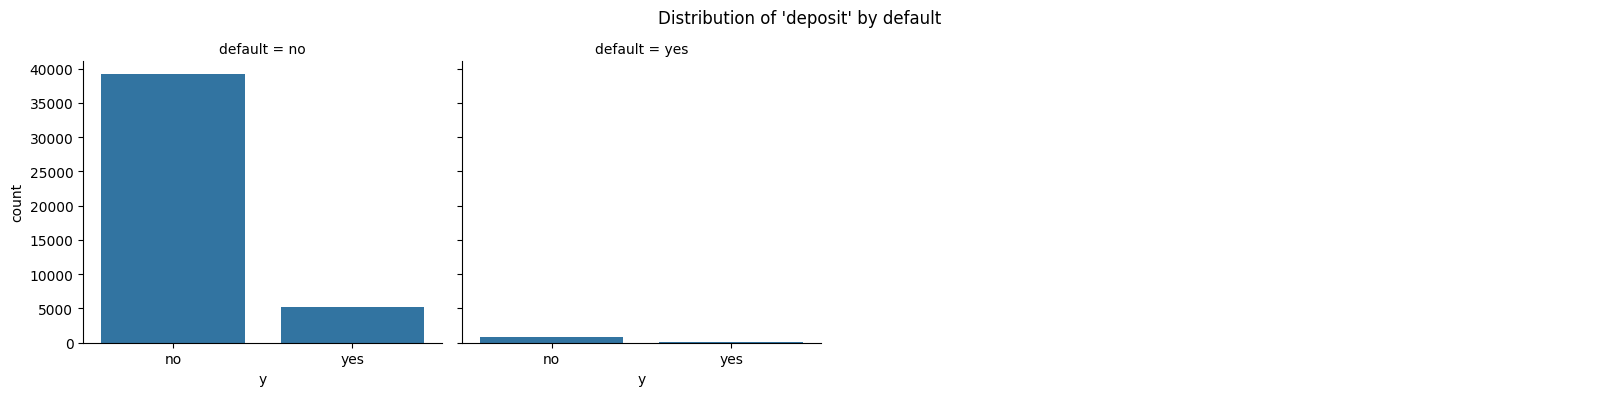

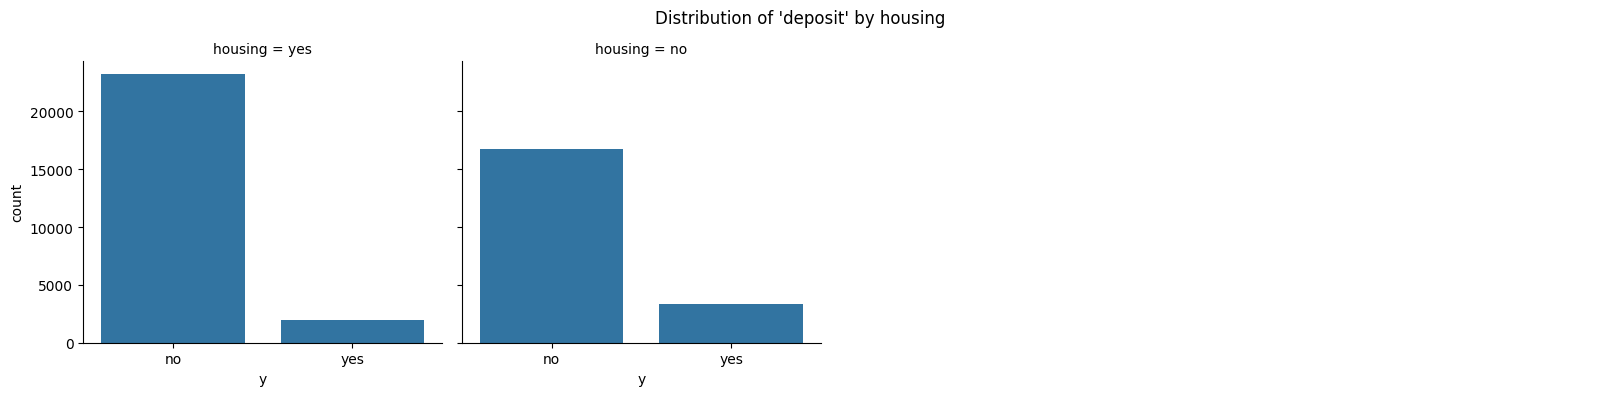

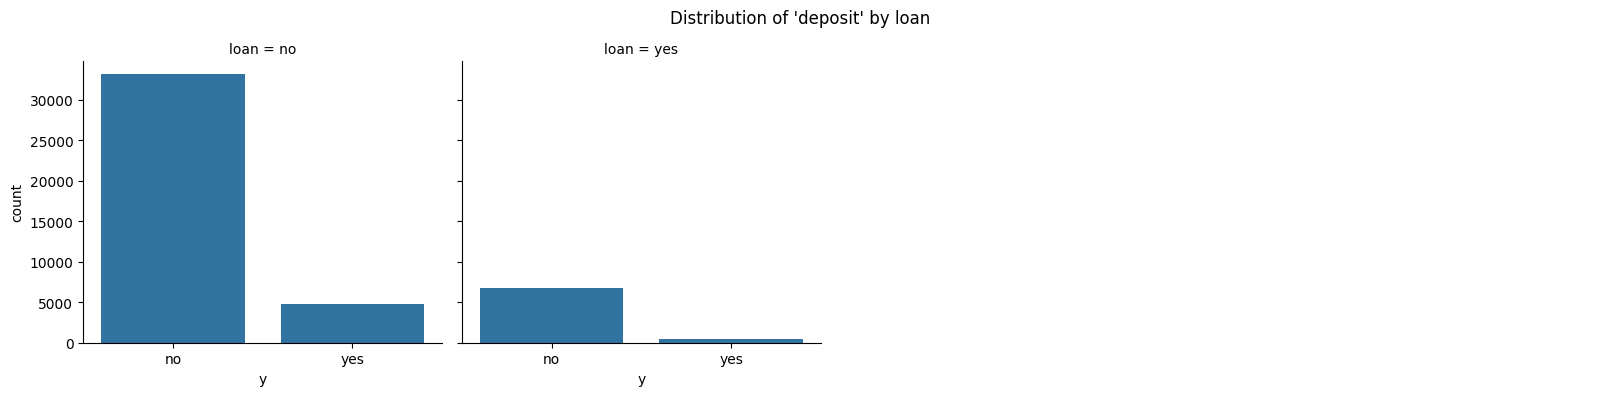

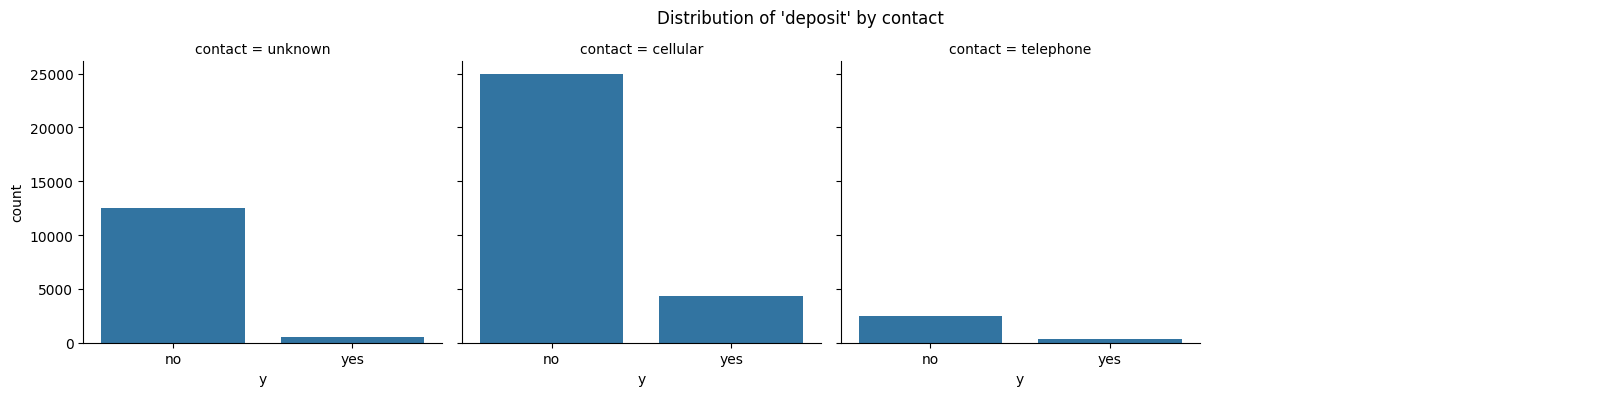

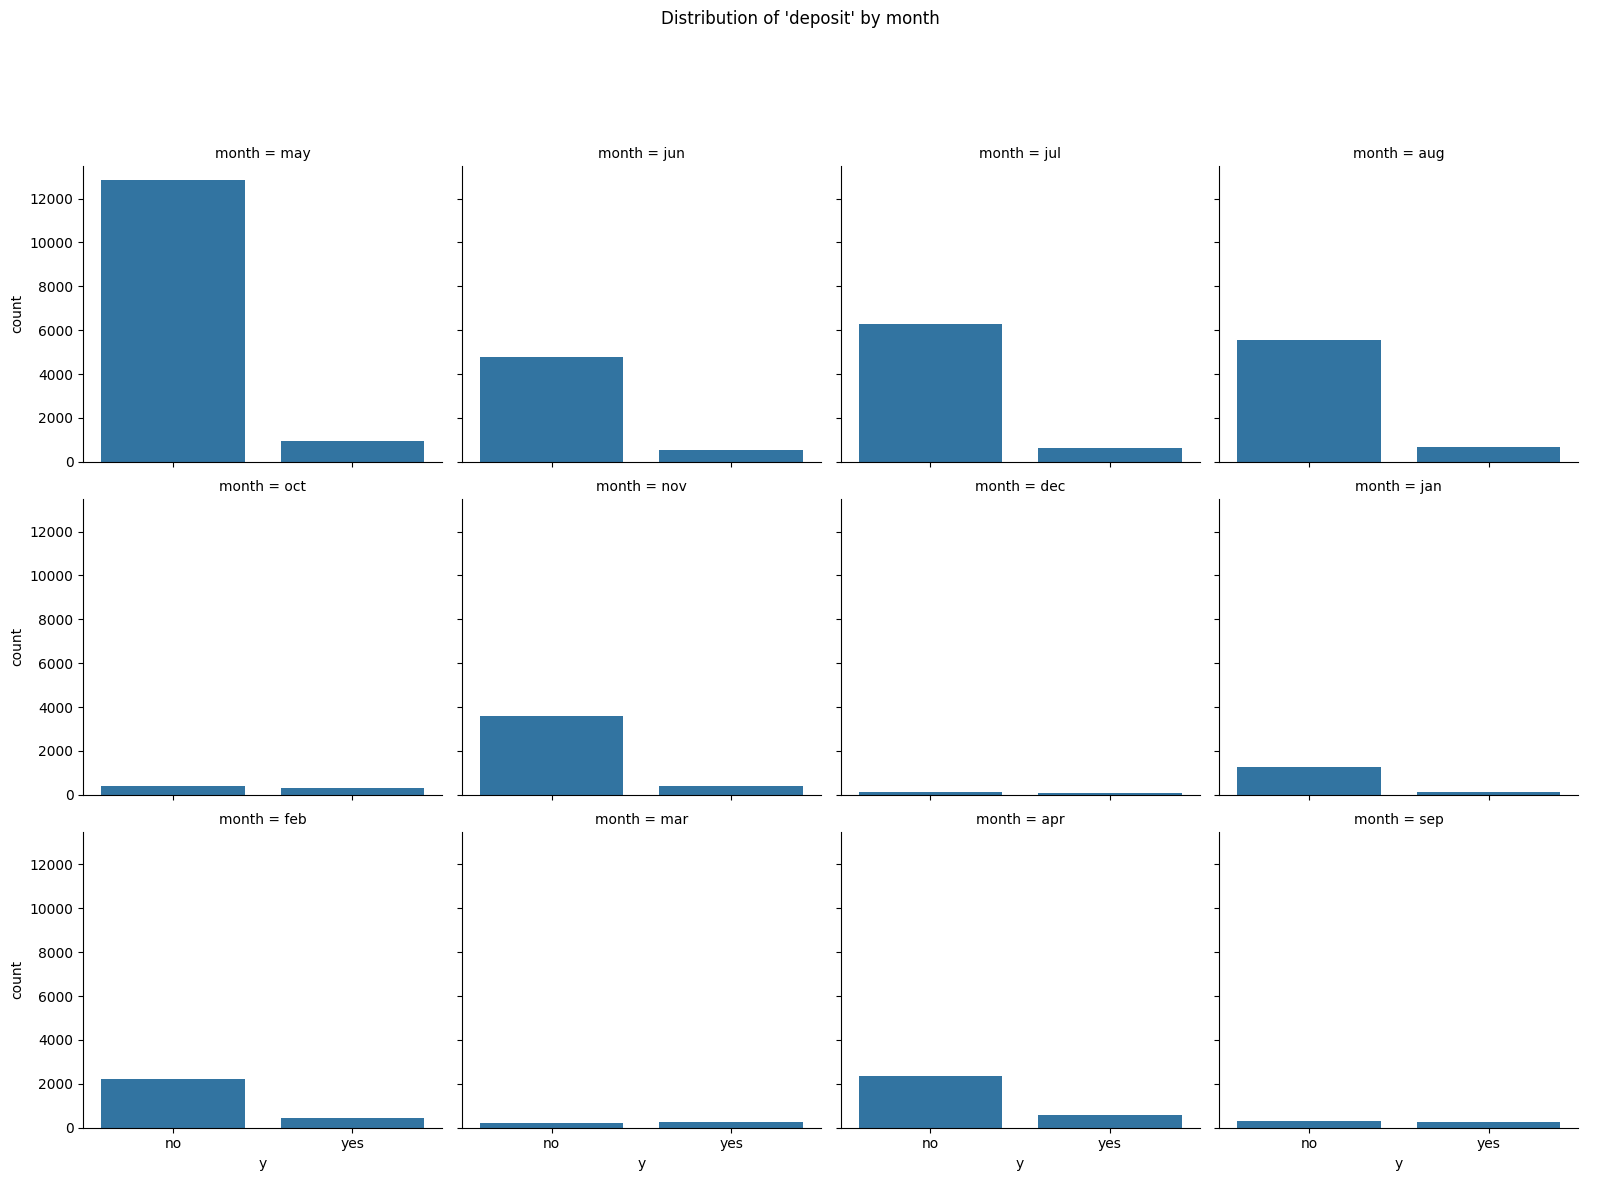

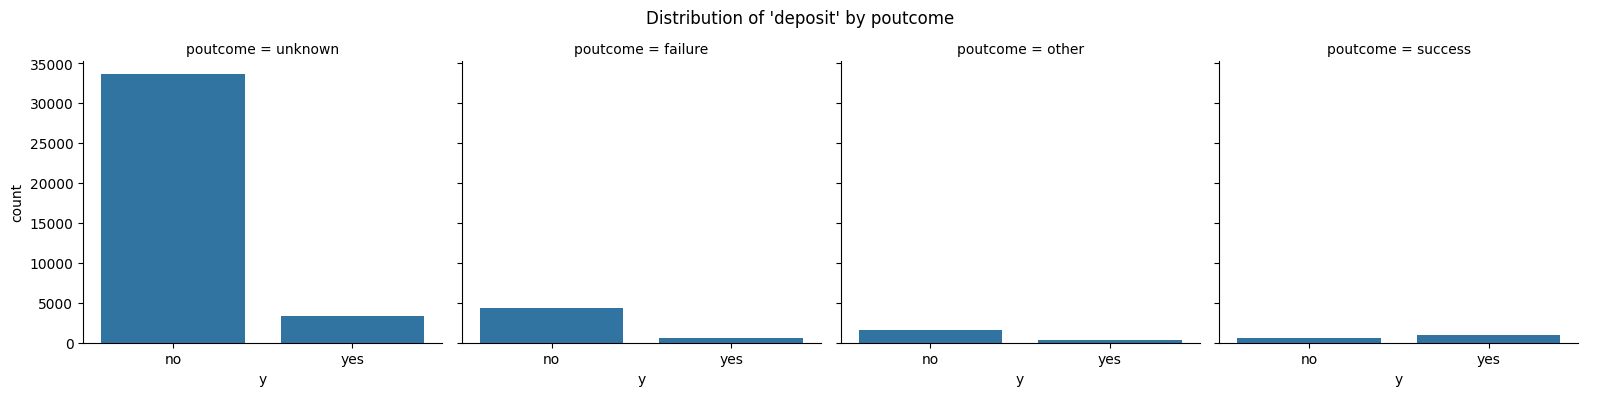

In [13]:
#Relationship between Categorical Features and Label
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
# Loop over each categorical feature and create a FacetGrid using catplot
for feature in categorical_features:
    g = sns.catplot(
        x=target,        # target column on x-axis
        col=feature,        # facet by the categorical feature
        data=df, 
        kind='count',
        col_wrap=4,         # wrap facets into rows of 4
        height=4,           # height of each facet
        aspect=1            # aspect ratio of each facet
    )
    g.fig.subplots_adjust(top=0.85)  # Adjust top spacing for the title
    g.fig.suptitle(f"Distribution of 'deposit' by {feature}")
    plt.show()


In [14]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby([target,categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

In [15]:
#Check target label split over categorical features and find the count v2
for feature in categorical_features:
    print(f"Counts for feature: {feature}")
    count_table = df.groupby([target, feature]).size().unstack(fill_value=0)
    print(count_table, "\n")


Counts for feature: job
job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     4540         9024          1364       1131        8157     1748   
yes     631          708           123        109        1301      516   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1392      3785      669        6757        1101      254  
yes            187       369      269         840         202       34   

Counts for feature: marital
marital  divorced  married  single
y                                 
no           4585    24459   10878
yes           622     2755    1912 

Counts for feature: education
education  primary  secondary  tertiary  unknown
y                                               
no            6260      20752     11305     1605
yes            591       2450      199

In [16]:
#numerical features
numerical_features = [col for col in df.select_dtypes(include='number').columns.tolist() if col.strip() != target]
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [17]:
# Find Discrete Numerical Features if it is more than 25 then it is continuous (having many unique values)
# Identify discrete features among numerical features using nunique()
discrete_features = [col for col in numerical_features if df[col].nunique() < 25]
print(f"Discrete Variables Count: {len(discrete_features)}")


Discrete Variables Count: 0


In [19]:
#Relation between Discrete numerical Features and Labels
for feature in discrete_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='y')
    plt.title(f"Relationship between {feature} and deposit")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()



"""
    for feature in discrete_features:
    # Create a crosstab for the feature and the target variable
    #ct = pd.crosstab(df[feature], df['y'])
    #print(f"Counts for {feature}:\n{ct}\n")
    
    # Plot the crosstab as a stacked bar chart
    ct.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"Relationship between {feature} and target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()
"""

'\n    for feature in discrete_features:\n    # Create a crosstab for the feature and the target variable\n    #ct = pd.crosstab(df[feature], df[\'y\'])\n    #print(f"Counts for {feature}:\n{ct}\n")\n    \n    # Plot the crosstab as a stacked bar chart\n    ct.plot(kind=\'bar\', stacked=True, figsize=(8, 4))\n    plt.title(f"Relationship between {feature} and target")\n    plt.xlabel(feature)\n    plt.ylabel("Count")\n    plt.show()\n'

In [20]:
#cont features number
continuous_features = [col for col in numerical_features if col not in (discrete_features + [target])]
print(f"Continuous feature Count: {len(continuous_features)}")


Continuous feature Count: 7


In [25]:
from scipy.stats import skew, kurtosis

for col in continuous_features:
    col_data = df[col].dropna() #removes null values
    print(f"{col}: Skewness = {skew(col_data):.2f}, Kurtosis = {kurtosis(col_data):.2f}")


"""
Skewness measures the asymmetry of a distribution:
Zero skewness means the distribution is symmetric.
Positive skewness indicates a long right tail (most values are low, with a few very high values).
Negative skewness indicates a long left tail (most values are high, with a few very low values).

Kurtosis measures the "tailedness" or the peak of a distribution:
Normal distribution (Fisher’s kurtosis) has a kurtosis of 0 (when using excess kurtosis) or 3 (when using raw kurtosis).
High positive kurtosis (leptokurtic) means there are more extreme outliers (heavier tails).
Negative kurtosis (platykurtic) indicates a flatter distribution with thinner tails
"""

age: Skewness = 0.68, Kurtosis = 0.32
balance: Skewness = 8.36, Kurtosis = 140.74
day: Skewness = 0.09, Kurtosis = -1.06
duration: Skewness = 3.14, Kurtosis = 18.15
campaign: Skewness = 4.90, Kurtosis = 39.25
pdays: Skewness = 2.62, Kurtosis = 6.93
previous: Skewness = 41.85, Kurtosis = 4506.36


'\nSkewness measures the asymmetry of a distribution:\nZero skewness means the distribution is symmetric.\nPositive skewness indicates a long right tail (most values are low, with a few very high values).\nNegative skewness indicates a long left tail (most values are high, with a few very low values).\n\nKurtosis measures the "tailedness" or the peak of a distribution:\nNormal distribution (Fisher’s kurtosis) has a kurtosis of 0 (when using excess kurtosis) or 3 (when using raw kurtosis).\nHigh positive kurtosis (leptokurtic) means there are more extreme outliers (heavier tails).\nNegative kurtosis (platykurtic) indicates a flatter distribution with thinner tails\n'

In [26]:
from scipy import stats
import numpy as np

# Calculate z-scores and count outliers (z-score > 3)
z_scores = np.abs(stats.zscore(df[continuous_features].dropna()))
outlier_counts = (z_scores > 3).sum(axis=0)
print("Outlier counts based on Z-score:")
print(outlier_counts)


Outlier counts based on Z-score:
age          381
balance      745
day            0
duration     963
campaign     840
pdays       1723
previous     582
dtype: int64


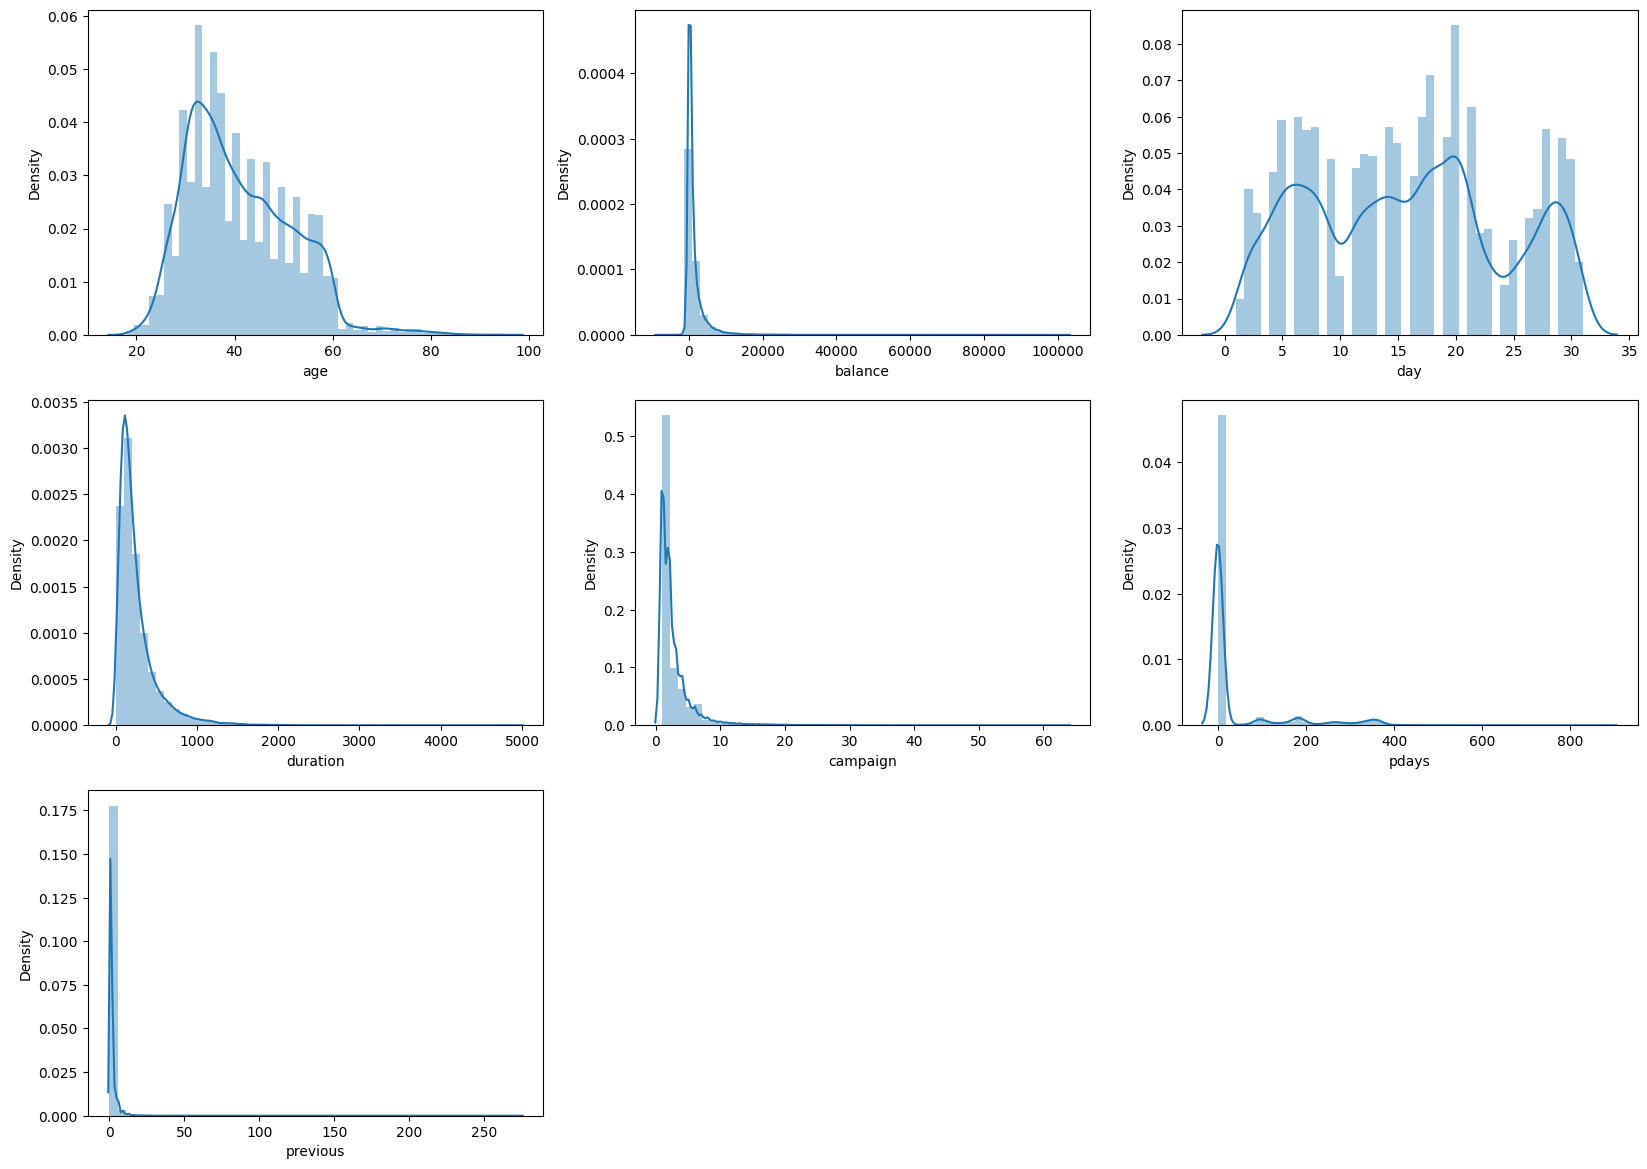

In [22]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

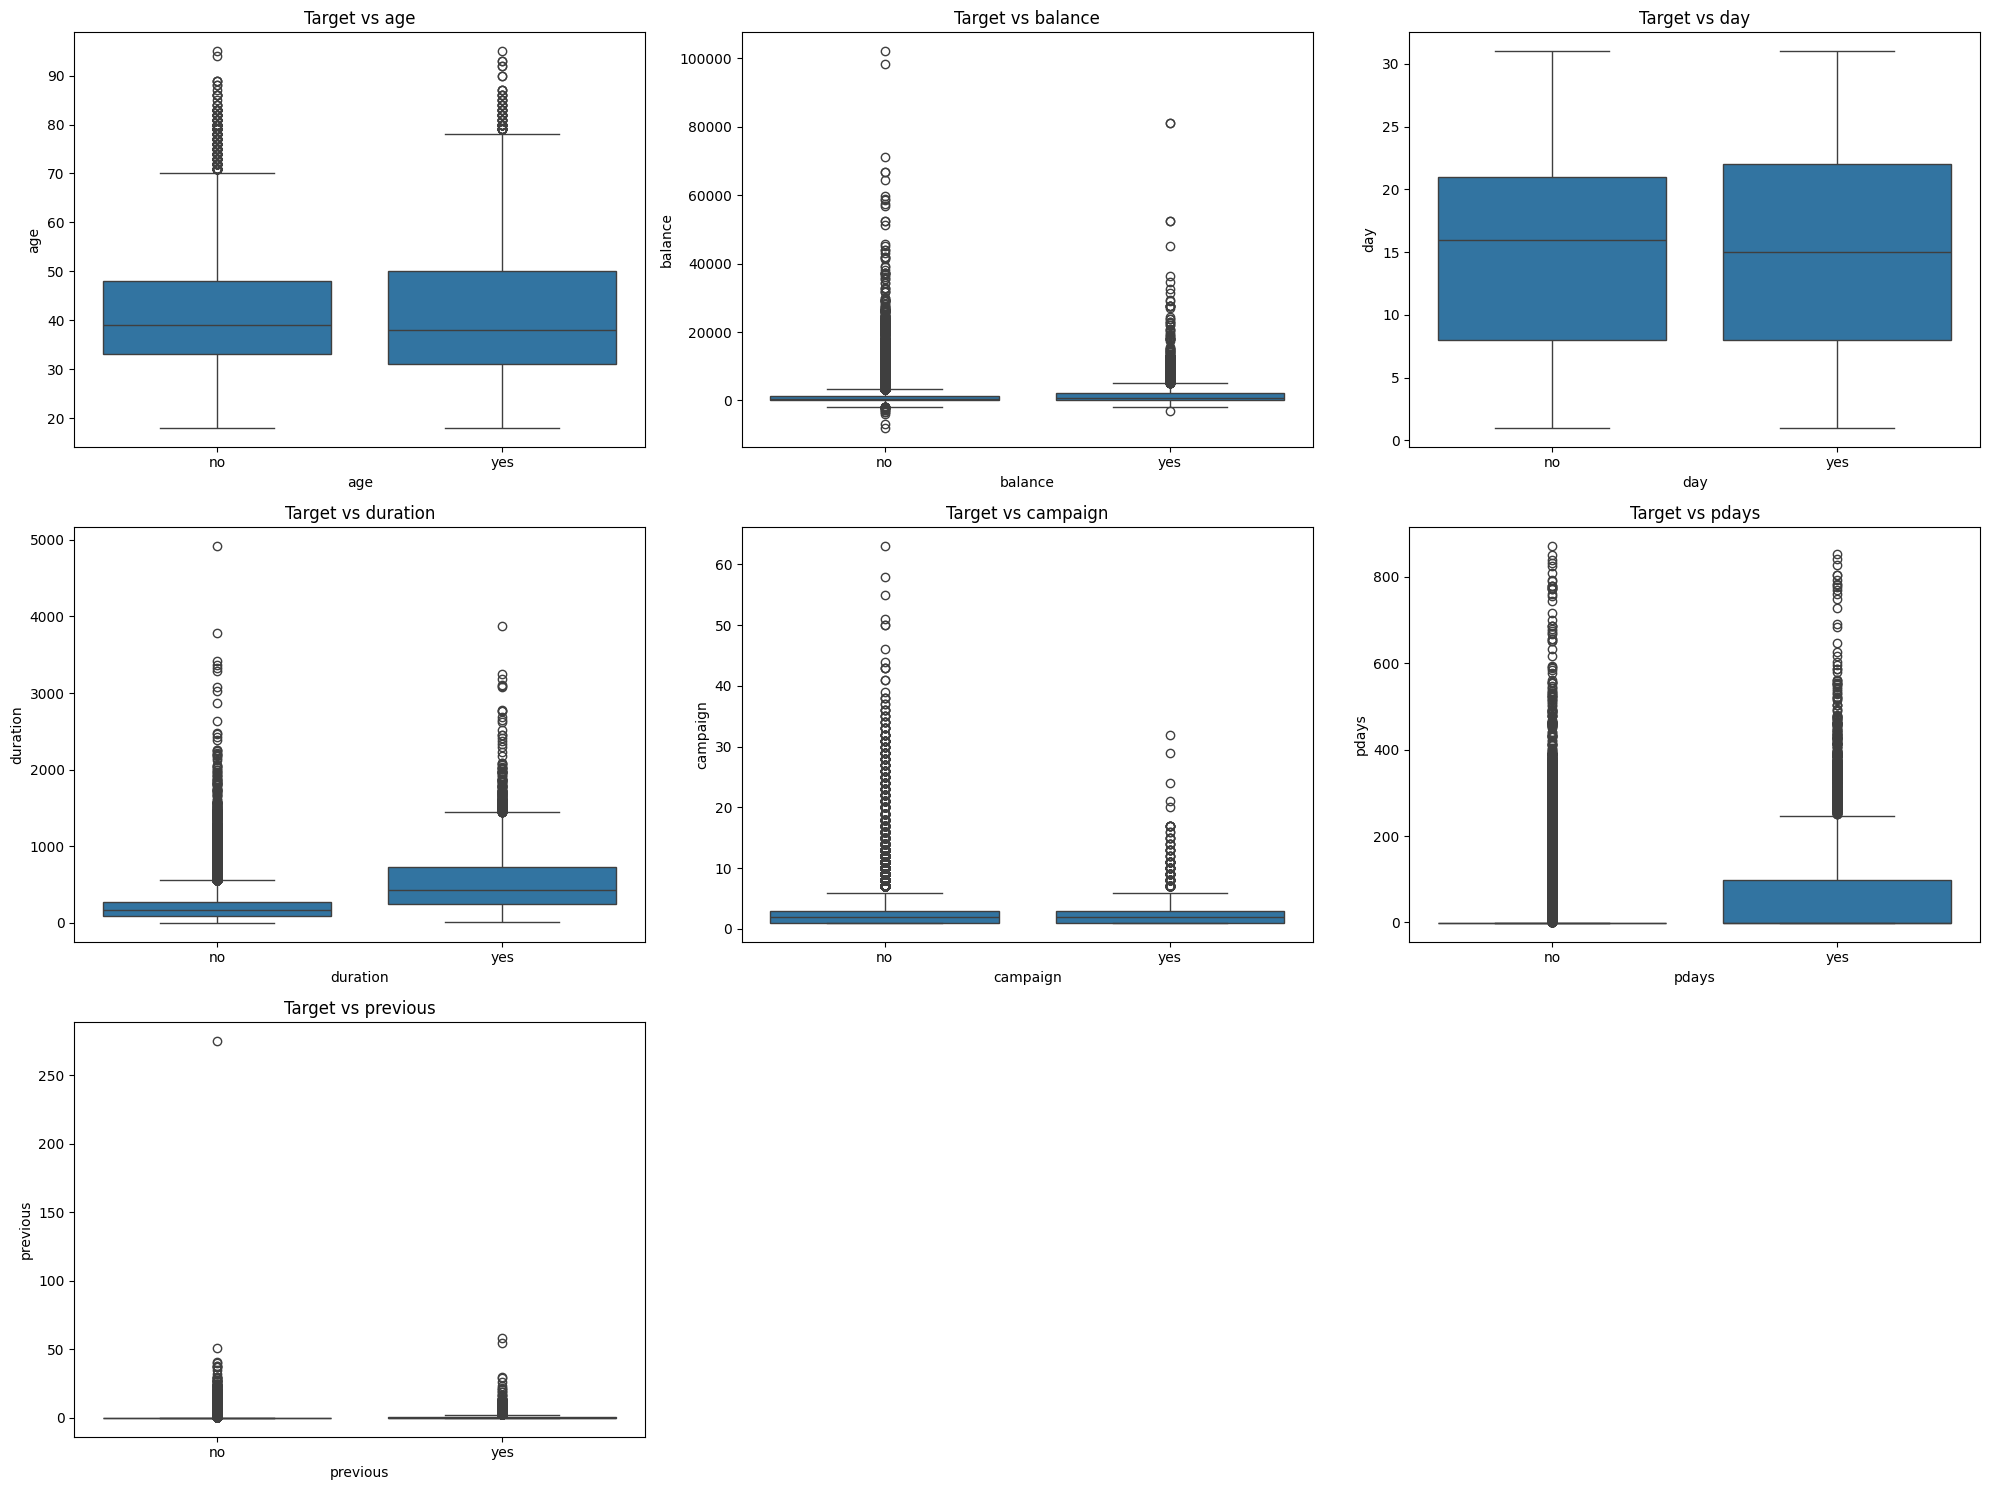

In [23]:
# Relation between Continous numerical Features and Labels
import math, matplotlib.pyplot as plt, seaborn as sns

cols = 3
rows = math.ceil(len(continuous_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), facecolor='white')
axes = axes.flatten()

for ax, feature in zip(axes, continuous_features):
    sns.boxplot(x=target, y=feature, data=df, ax=ax)
    ax.set_title(f"Target vs {feature}")
    ax.set_xlabel(feature)

# Hide any unused subplots
for ax in axes[len(continuous_features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


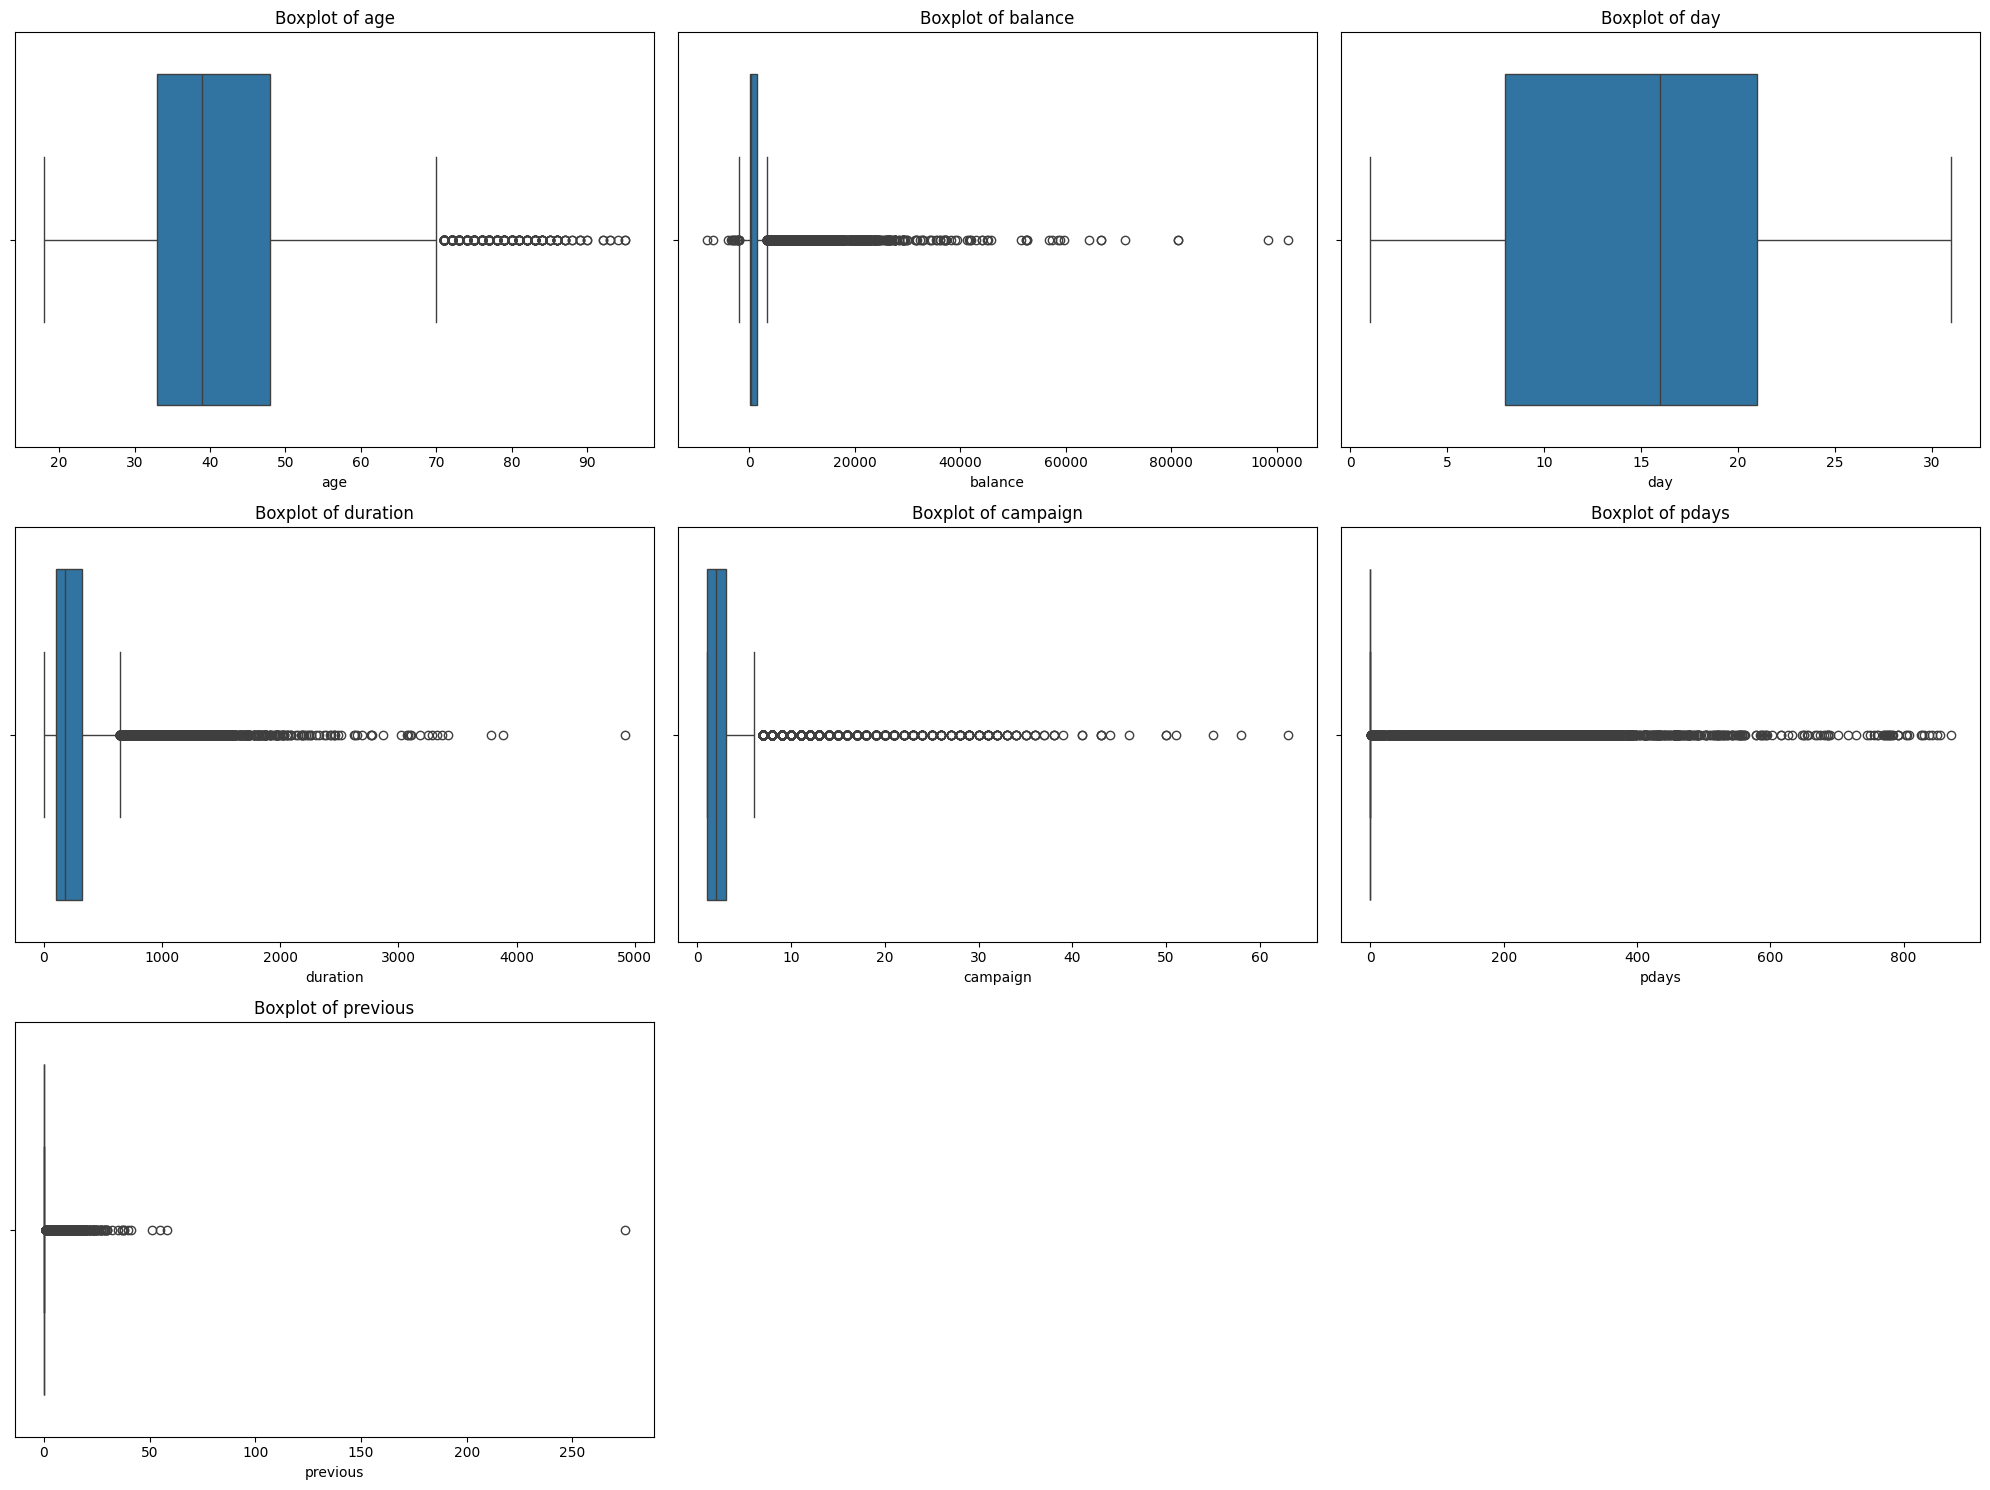

In [27]:
#Find Outliers in numerical features
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Determine grid size dynamically
cols = 3
rows = math.ceil(len(numerical_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), facecolor='white')
axes = axes.flatten()

# Plot boxplots for each numerical feature to detect outliers
for ax, feature in zip(axes, numerical_features):
    sns.boxplot(x=df[feature], ax=ax)
    ax.set_xlabel(feature)
    ax.set_title(f"Boxplot of {feature}")

# Hide any unused subplots if there are extra axes
for ax in axes[len(numerical_features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


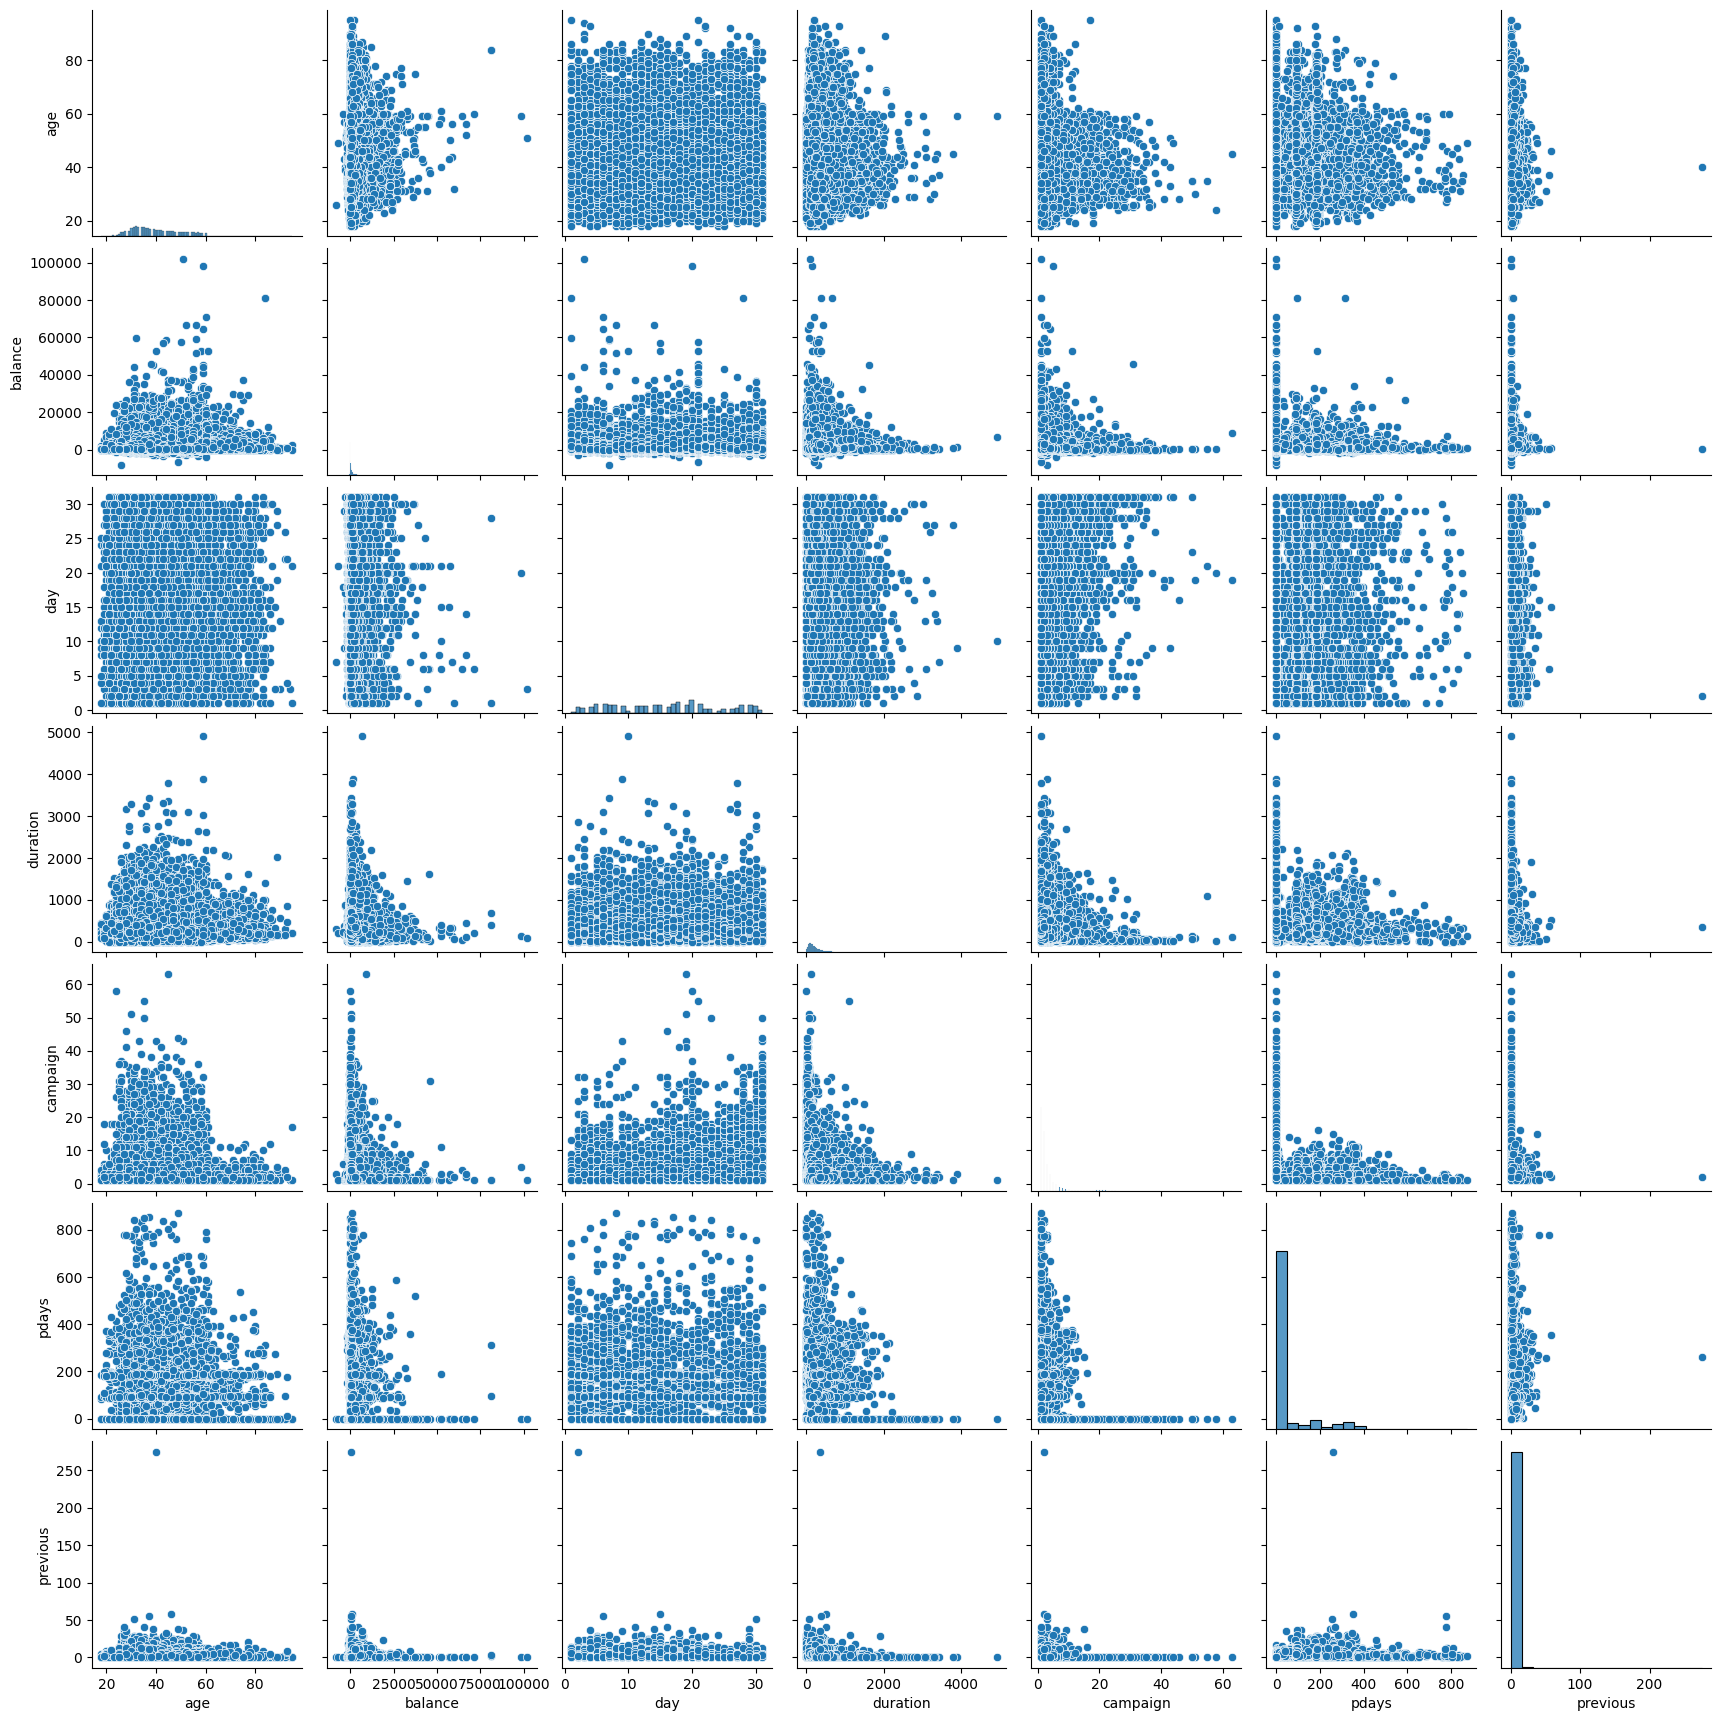

In [28]:
import seaborn as sns

# Create a pairplot of continuous features
sns.pairplot(df[continuous_features].dropna())
plt.show()


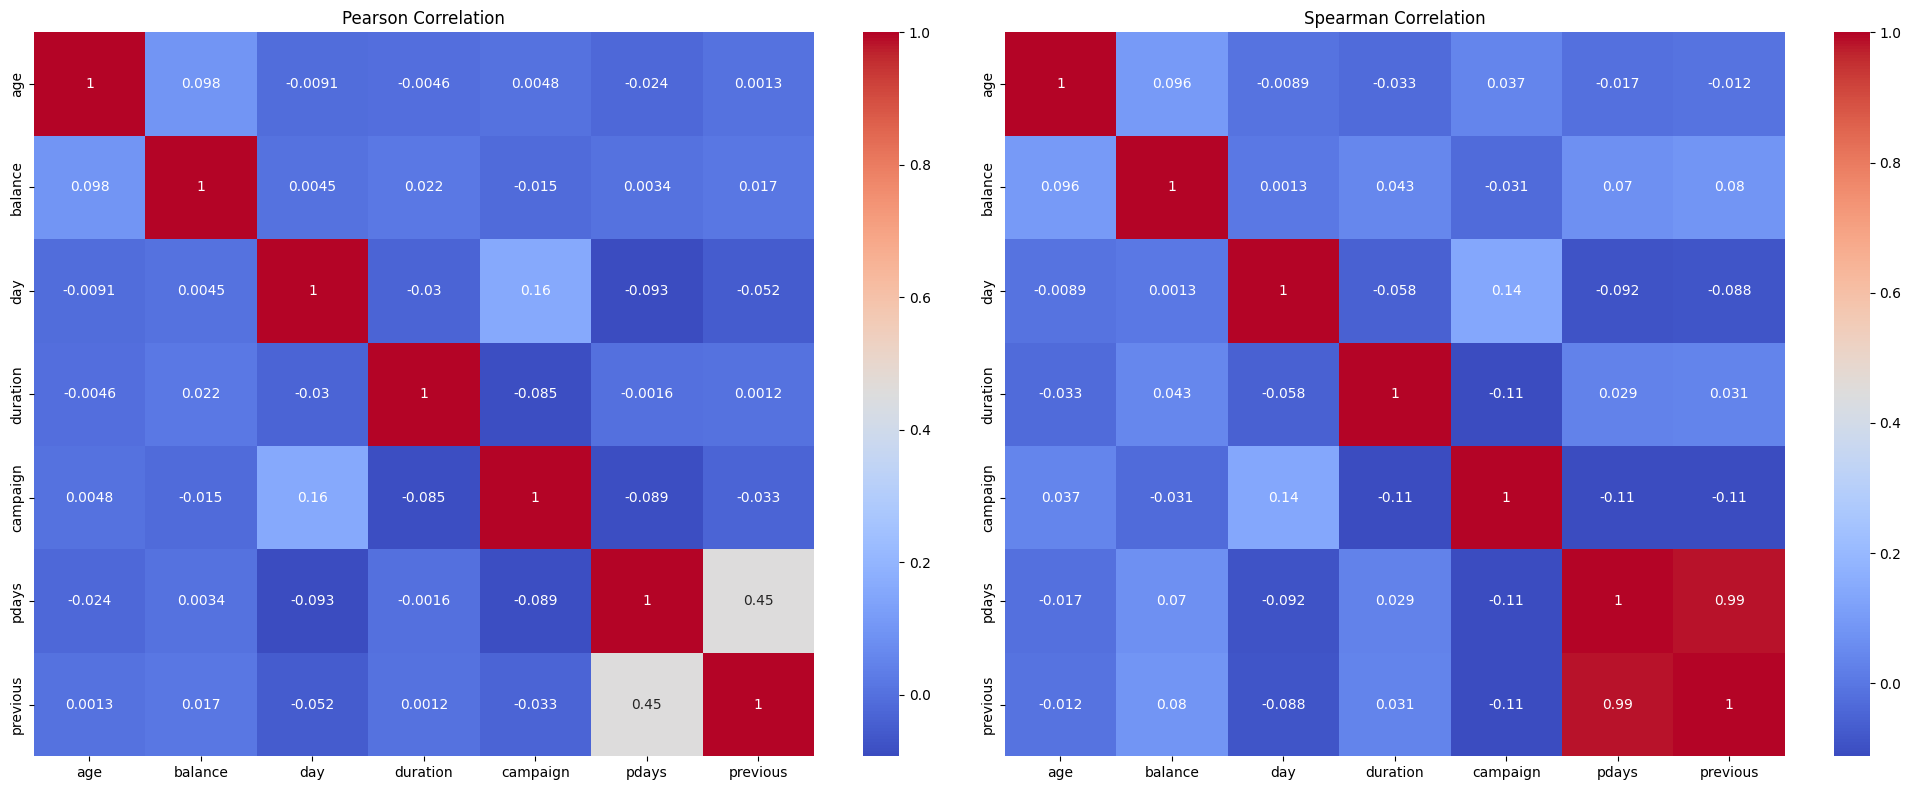

In [29]:
#Explore the Correlation between numerical features
## Checking for correlation

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrices for Pearson and Spearman methods.corr
corr_pearson = numeric_df.corr(method='pearson')
corr_spearman = numeric_df.corr(method='spearman')

# Create subplots: one row, two columns
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot Pearson correlation heatmap
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title("Pearson Correlation")

# Plot Spearman correlation heatmap
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title("Spearman Correlation")

plt.tight_layout()
plt.show()

PS. If using a linear model (e.g., logistic regression, linear regression), highly correlated features can cause instability (multicollinearity). Drop High correlated one. 
If two features contain almost the same information
If your dataset has too many features, dropping correlated ones can make the model simpler and more efficient. Think carefully.
in Tree-based models don’t suffer from multicollinearity as much as linear models.
If Correlation is Meaningful do not drop.
If You Plan to Use PCA (Principal Component Analysis) do not drop.

Percentage:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


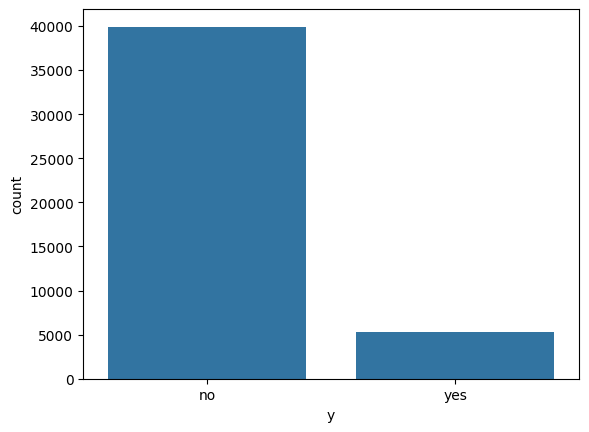

Target count


y
no     39922
yes     5289
Name: y, dtype: int64

In [32]:
#Check the Data set is balanced or not based on target values in classification
# Count and percentage of each class in the target variable 'y'
print('Percentage:')
print(df[target].value_counts(normalize=True))
#total patient count based on cardio_results
sns.countplot(x=target,data=df)
plt.show()
print('Target count')
df[target].groupby(df[target]).count()

Feature Engineering
Remove unnecessary features
Manage missing values
Process categorical variables
Apply feature scaling
Detect and eliminate outliers

In [37]:
def compute_outlier_bounds(df, features, iqr_factor=1.5, z_threshold=3, lower_percentile=0.01, upper_percentile=0.99):
    """
    Computes and prints outlier thresholds for given features using IQR, z-score, and percentiles.
    
    Parameters:
    - iqr_factor: multiplier for the IQR method (default 1.5).
    - z_threshold: threshold for z-score method (default 3).
    - lower_percentile, upper_percentile: percentiles for percentile-based bounds (default 1% and 99%).
    
    Returns:
    - A dictionary with computed bounds and statistics for each feature.
    """
    results = {}
    for col in features:
        # Exclude missing values for computations
        col_data = df[col].dropna()
        
        # IQR method
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_iqr = Q1 - iqr_factor * IQR
        upper_iqr = Q3 + iqr_factor * IQR
        
        # Z-score method
        mean = col_data.mean()
        std = col_data.std()
        lower_z = mean - z_threshold * std
        upper_z = mean + z_threshold * std
        
        # Percentile method
        lower_pct = col_data.quantile(lower_percentile)
        upper_pct = col_data.quantile(upper_percentile)
        
        # Store results
        results[col] = {
            "IQR": {"lower": lower_iqr, "upper": upper_iqr},
            "z_score": {"lower": lower_z, "upper": upper_z},
            "percentile": {"lower": lower_pct, "upper": upper_pct},
            "mean": mean,
            "std": std,
            "Q1": Q1,
            "Q3": Q3,
            "IQR_value": IQR
        }
        
        # Print summary for the current feature
        print(f"Feature: {col}")
        print(f"  IQR method: lower bound = {lower_iqr:.2f}, upper bound = {upper_iqr:.2f}")
        print(f"  z-score method: lower bound = {lower_z:.2f}, upper bound = {upper_z:.2f}")
        print(f"  Percentile method ({lower_percentile*100:.0f}th, {upper_percentile*100:.0f}th): lower bound = {lower_pct:.2f}, upper bound = {upper_pct:.2f}")
        print("-" * 60)
    return results

# Example usage:
# Suppose continuous_features is a list of your numeric feature names
results = compute_outlier_bounds(df, continuous_features)


Feature: age
  IQR method: lower bound = 10.50, upper bound = 70.50
  z-score method: lower bound = 9.08, upper bound = 72.79
  Percentile method (1th, 99th): lower bound = 23.00, upper bound = 71.00
------------------------------------------------------------
Feature: balance
  IQR method: lower bound = -1962.00, upper bound = 3462.00
  z-score method: lower bound = -7772.03, upper bound = 10496.57
  Percentile method (1th, 99th): lower bound = -627.00, upper bound = 13164.90
------------------------------------------------------------
Feature: day
  IQR method: lower bound = -11.50, upper bound = 40.50
  z-score method: lower bound = -9.16, upper bound = 40.77
  Percentile method (1th, 99th): lower bound = 2.00, upper bound = 31.00
------------------------------------------------------------
Feature: duration
  IQR method: lower bound = -221.00, upper bound = 643.00
  z-score method: lower bound = -514.42, upper bound = 1030.75
  Percentile method (1th, 99th): lower bound = 11.00, up

In [45]:
df['job_group'] = df['job'].replace({
    'blue-collar': 'worker',
    'technician': 'worker',
    'services': 'worker',
    'admin.': 'white-collar',
    'management': 'white-collar',
    'entrepreneur': 'business-owner',
    'self-employed': 'business-owner',
    'retired': 'non-working',
    'student': 'non-working',
    'housemaid': 'non-working',
    'unemployed': 'non-working'
})

#df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['is_summer'] = df['month'].isin(['jun', 'jul', 'aug']).astype(int)
df['is_winter'] = df['month'].isin(['dec', 'jan', 'feb']).astype(int)
df['is_spring'] = df['month'].isin(['mar', 'apr', 'may']).astype(int)
df['is_fall'] = df['month'].isin(['sep', 'oct', 'nov']).astype(int)

print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'job_group', 'is_summer', 'is_winter', 'is_spring', 'is_fall']


In [ ]:
job_stability = {
    'management': 3, 'admin.': 2, 'technician': 2, 'services': 1, 
    'blue-collar': 1, 'entrepreneur': 1, 'self-employed': 1, 
    'retired': 3, 'student': 0, 'unemployed': 0, 'housemaid': 1
}
df['job_stability'] = df['job'].map(job_stability)
#you might want to use or you can ignore this.

In [46]:
def auto_group_analysis(df, target, instructions):
    """
    Automates grouping analysis

    Parameters:
    - target: The target column name (e.g., 'y').
    - instructions: A dictionary where each key is a feature name and each value is a dict with:
         - 'action': "print", "filter", or "drop".
         - If 'action' is "filter", you can also provide 'max' to filter values < max.
         
    Returns:
    - The modified DataFrame after applying instructions.
    """
    for feature, instr in instructions.items():
        print(f"\nAnalysis for feature: {feature}")
        # Group by target and feature, then print the counts
        grouped_counts = df.groupby([target, feature]).size().unstack(fill_value=0)
        print(grouped_counts)
        print("-" * 60)
        
        action = instr.get("action", "print")
        if action == "drop":
            df.drop(columns=[feature], inplace=True)
            print(f"Dropped feature: {feature}")
            print('---')
        elif action == "filter":
            max_val = instr.get("max")
            if max_val is not None:
                df = df[df[feature] < max_val]
                print(f"After filtering {feature} < {max_val}:")
                grouped_counts = df.groupby([target, feature]).size().unstack(fill_value=0)
                print(grouped_counts)
                print("-" * 60)
    return df

# Define the instructions for each feature
instructions = {
    "default": {"action": "drop"},
    "pdays": {"action": "drop"},
    "month": {"action": "drop"},
    "job": {"action": "drop"},
    "age": {"action": "print"},
    "balance": {"action": "print"},
    "duration": {"action": "print"},
    "campaign": {"action": "filter", "max": 33},     # filter out campaign >= 33
    "previous": {"action": "filter", "max": 31}      # filter out previous >= 31
}

# Create a working copy of your DataFrame
df2 = df.copy()

# Apply the automated grouping analysis
df2 = auto_group_analysis(df2, target=target, instructions=instructions)



Analysis for feature: default
default     no  yes
y                  
no       39159  763
yes       5237   52
------------------------------------------------------------
Dropped feature: default
---

Analysis for feature: pdays
pdays   -1     1     2     3     4     5     6     7     8     9    ...   805  \
y                                                                   ...         
no     33570     9    35     1     1    11     9     7    25     9  ...     0   
yes     3384     6     2     0     1     0     1     0     0     3  ...     1   

pdays   808   826   828   831   838   842   850   854   871  
y                                                            
no        1     1     0     1     1     0     1     0     1  
yes       0     0     1     0     0     1     0     1     0  

[2 rows x 559 columns]
------------------------------------------------------------
Dropped feature: pdays
---

Analysis for feature: month
month   apr   aug  dec   feb   jan   jul   jun  mar    m

In [47]:
print(df2.columns.tolist())

['age', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'previous', 'poutcome', 'y', 'job_group', 'is_summer', 'is_winter', 'is_spring', 'is_fall']


In [62]:
def add_group_feature(df, group_feature, target, agg_func, new_feature_name):
    group_stats = df.groupby(group_feature)[target].apply(agg_func)
    df[new_feature_name] = df.set_index(group_feature).index.map(group_stats)
    return df

df2['age_group'] = pd.cut(df2['age'], bins=[17, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Campaign and Job combined conversion rate
df2 = add_group_feature(df2, group_feature=['campaign', 'job_group'], target=target,
                       agg_func=lambda x: (x == 'yes').mean(),
                       new_feature_name='campaign_job_conv_rate')

#job conversion rate
df2 = add_group_feature(df2, group_feature='job_group', target=target,
                       agg_func=lambda x: (x == 'yes').mean(),
                       new_feature_name='job_conversion_rate')

# Campaign and Age Group conversion rate
df2 = add_group_feature(df2, group_feature=['campaign', 'age_group'], target=target,
                       agg_func=lambda x: (x == 'yes').mean(),
                       new_feature_name='campaign_agegroup_conv_rate')

df2 = add_group_feature(df2, group_feature='age_group', target='balance',
                       agg_func=lambda x: x.mean(),
                       new_feature_name='age_group_avg_balance')

df2 = add_group_feature(df2, group_feature=['job_group', 'age_group'], target=target,
                       agg_func=lambda x: (x == 'yes').mean(),
                       new_feature_name='job_agegroup_conv_rate')

print("New features added:")
print(df2[['campaign', 'campaign_agegroup_conv_rate', 'age', 'age_group', 'balance', 'age_group_avg_balance', 'campaign_job_conv_rate', 'job_conversion_rate', 'job_agegroup_conv_rate']].head(100))

New features added:
    campaign  campaign_agegroup_conv_rate  age age_group  balance  \
0          1                          0.0   58     56-65     2143   
1          1                          0.0   44     36-45       29   
2          1                          0.0   33     26-35        2   
3          1                          0.0   47     46-55     1506   
4          1                          0.0   33     26-35        1   
..       ...                          ...  ...       ...      ...   
95         1                          0.0   36     36-45      101   
96         1                          0.0   55     46-55      383   
97         1                          0.0   60     56-65       81   
98         1                          0.0   39     36-45        0   
99         1                          0.0   46     46-55      229   

   age_group_avg_balance  campaign_job_conv_rate  job_conversion_rate  \
0            1958.071842                     0.0                  0.0   
1    

In [63]:
bool_columns = ['housing', 'loan', 'y']
df2[bool_columns] = df2[bool_columns].replace({'yes': 1, 'no': 0})
#This code directly replaces 'yes' with 1 and 'no' with 0 in the specified columns of df4 without creating new columns.

In [69]:
# Numerical columns (excluding the target)
num_features = [
    col for col in df2.select_dtypes(include='number').columns.tolist() if col.strip() != target
]
print(num_features)

categorical_features = [col for col in df2.select_dtypes(include=['object', 'category']).columns if col.strip() != target]
print(categorical_features)

"""
Feature Type	        Preprocessing	             Recommended Transformer (sklearn)
Binary categorical	   Label Encoding	                    OrdinalEncoder or custom mapping
Non-binary categorical	Target Encoding (Smoothed) or One-hot encoding	    TargetEncoder or OneHotEncoder
Numerical features	     Standard Scaling or Robust Scaling	StandardScaler, RobustScaler, or MinMaxScaler
"""

['age', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'previous', 'is_summer', 'is_winter', 'is_spring', 'is_fall', 'campaign_job_conv_rate', 'job_conversion_rate', 'campaign_agegroup_conv_rate', 'age_group_avg_balance', 'job_agegroup_conv_rate']
['marital', 'education', 'contact', 'poutcome', 'job_group', 'age_group']


'\nFeature Type\t        Preprocessing\t             Recommended Transformer (sklearn)\nBinary categorical\t   Label Encoding\t                    OrdinalEncoder or custom mapping\nNon-binary categorical\tTarget Encoding (Smoothed) or One-hot encoding\t    TargetEncoder or OneHotEncoder\nNumerical features\t     Standard Scaling or Robust Scaling\tStandardScaler, RobustScaler, or MinMaxScaler\n'

In [65]:
df2.head()


,age,marital,education,balance,housing,loan,contact,day,duration,campaign,...,is_summer,is_winter,is_spring,is_fall,age_group,campaign_job_conv_rate,job_conversion_rate,campaign_agegroup_conv_rate,age_group_avg_balance,job_agegroup_conv_rate
0,58,married,tertiary,2143,1,0,unknown,5,261,1,...,0,0,1,0,56-65,0.0,0.0,0.0,1958.071842,0.0
1,44,single,secondary,29,1,0,unknown,5,151,1,...,0,0,1,0,36-45,0.0,0.0,0.0,1319.812139,0.0
2,33,married,secondary,2,1,1,unknown,5,76,1,...,0,0,1,0,26-35,0.0,0.0,0.0,1147.549068,0.0
3,47,married,unknown,1506,1,0,unknown,5,92,1,...,0,0,1,0,46-55,0.0,0.0,0.0,1466.936255,0.0
4,33,single,unknown,1,0,0,unknown,5,198,1,...,0,0,1,0,26-35,0.0,0.0,0.0,1147.549068,0.0


In [ ]:
print(df2['age_group_avg_balance'].dtype)
df2['age_group_avg_balance'] = pd.to_numeric(df2['age_group_avg_balance'], errors='coerce')
# or
#df['age_group_avg_balance'] = df['age_group_avg_balance'].astype(float)
print(df2['age_group_avg_balance'].dtype)
#we did here because age group was coming as category

float64
float64


In [73]:
missing_cols = [col for col in categorical_features if col not in df2.columns]
if missing_cols:
    print(f"⚠️ Warning: The following categorical features are missing from the DataFrame: {missing_cols}")


In [72]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

def encode_categorical(df, categorical_features, ordinal_features=None, low_cardinality_threshold=15, high_cardinality_threshold=30):
    """
    Encodes categorical features in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame
    - categorical_features: list of categorical column names
    - ordinal_features: list of columns to encode using OrdinalEncoder (default: None)
    - low_cardinality_threshold: max unique values for OneHotEncoder (default: 15)
    - high_cardinality_threshold: min unique values for high-cardinality encoding (default: 30)
    
    Returns:
    - Transformed DataFrame with encoded categorical features.
    """
    df = df.copy()  # Avoid modifying the original DataFrame
    ordinal_features = ordinal_features or []

    # Print unique category counts for debugging
    print("\n🔍 Unique values per categorical feature:")
    for col in categorical_features:
        print(f"{col}: {df[col].nunique()}")

    # Identify feature types
    non_ordinal_features = [col for col in categorical_features if col not in ordinal_features]
    binary_cols = [col for col in non_ordinal_features if df[col].nunique() == 2]
    low_card_cols = [col for col in non_ordinal_features if 2 < df[col].nunique() <= low_cardinality_threshold]
    high_card_cols = [col for col in non_ordinal_features if df[col].nunique() > high_cardinality_threshold]

    # Identify missing features (not classified into any category)
    uncategorized_features = [col for col in non_ordinal_features if col not in binary_cols + low_card_cols + high_card_cols]

    # Debugging Outputs
    print("\n📊 Encoding Summary:")
    print(f"Ordinal Features: {ordinal_features}")
    print(f"Binary Features: {binary_cols}")
    print(f"Low-Cardinality Features (OHE): {low_card_cols}")
    print(f"High-Cardinality Features (Frequency Encoding): {high_card_cols}")
    print(f"⚠️ Uncategorized Features (Fallback Encoding): {uncategorized_features}")

    # Encode ordinal features
    if ordinal_features:
        df[ordinal_features] = OrdinalEncoder().fit_transform(df[ordinal_features])
    
    # Encode binary features
    if binary_cols:
        df[binary_cols] = OrdinalEncoder().fit_transform(df[binary_cols]).astype(int)  # Convert to 0/1
    
    # Encode low-cardinality features (One-Hot Encoding)
    if low_card_cols:
        df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)
    
    # Encode high-cardinality features (Frequency Encoding)
    if high_card_cols:
        for col in high_card_cols:
            print(f"Applying Frequency Encoding to {col}")  # Debugging
            df[col] = df[col].map(df[col].value_counts(normalize=True))

    # Encode leftover features using One-Hot Encoding (instead of Ordinal Encoding)
    if uncategorized_features:
        print(f"⚠️ Applying One-Hot Encoding to uncategorized features: {uncategorized_features}")
        df = pd.get_dummies(df, columns=uncategorized_features, drop_first=True)

    # Convert boolean columns to 0/1
    df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

    return df

# Example Usage:
df_encoded = encode_categorical(df2, categorical_features=categorical_features, ordinal_features=['education'])
df_encoded.head()



🔍 Unique values per categorical feature:
marital: 3
education: 4
contact: 3
poutcome: 4
job_group: 5
age_group: 6

📊 Encoding Summary:
Ordinal Features: ['education']
Binary Features: []
Low-Cardinality Features (OHE): ['marital', 'contact', 'poutcome', 'job_group', 'age_group']
High-Cardinality Features (Frequency Encoding): []
⚠️ Uncategorized Features (Fallback Encoding): []


,age,education,balance,housing,loan,day,duration,campaign,previous,y,...,poutcome_unknown,job_group_non-working,job_group_unknown,job_group_white-collar,job_group_worker,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,age_group_66+
0,58,2.0,2143,1,0,5,261,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,44,1.0,29,1,0,5,151,1,0,0,...,1,0,0,0,1,0,1,0,0,0
2,33,1.0,2,1,1,5,76,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,47,3.0,1506,1,0,5,92,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,33,3.0,1,0,0,5,198,1,0,0,...,1,0,1,0,0,1,0,0,0,0


# The 'models' dictionary holds our machine learning models and their settings.
# Each key in the dictionary is a model name (for example, 'RandomForestClassifier'),
# and its corresponding value is another dictionary that contains:
#   - 'model': the actual model instance (like a RandomForestClassifier object),
#   - 'param': a dictionary of hyperparameters (settings) we want to test for that model.
#
# When we loop over the dictionary using:
#     for name, config in models.items():
# Here’s what happens:
#   - models.items() returns pairs of (key, value) from the dictionary.
#   - 'name' becomes the model's name (e.g., 'RandomForestClassifier').
#   - 'config' becomes the inner dictionary holding that model's instance and hyperparameter grid.
#
# This approach allows us to:
#   1. Easily perform cross-validation on each model using:
#          scores = cross_val_score(config['model'], X_train, y_train, cv=5)
#      where config['model'] fetches the actual model.
#
#   2. Perform hyperparameter tuning using GridSearchCV:
#          grid = GridSearchCV(estimator=config['model'], param_grid=config['param'], cv=5, n_jobs=-1)
#      Here, config['param'] gives us the set of hyperparameters to try.
#
# By using the loop with 'name' and 'config', we avoid repeating similar code for each model,
# making the code more flexible and easier to maintain.


In [80]:
#Choosing model
#RandomForestClassifier and XGBClassifier
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
X = df_encoded.drop([target], axis=1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)





In [84]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data and create a balanced dataset
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(X_train_balanced.shape)
print(y_train_balanced.value_counts())

(63848, 34)
y
0    31924
1    31924
Name: count, dtype: int64


In [85]:
# Define models and their hyperparameter grids
models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=0),
        'param': {
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': list(range(2, 4)),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss'),
        'param': {
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

# Cross-Validation evaluation for each model
cv_results = {}
print("Cross-Validation Results:")
for name, config in models.items():
    scores = cross_val_score(config['model'], X_train_balanced, y_train_balanced, cv=5)
    cv_results[name] = scores
    print(f"{name}:")
    print(f"  Scores: {scores}")
    print(f"  Mean CV Score: {scores.mean():.4f}\n")


Cross-Validation Results:
RandomForestClassifier:
  Scores: [0.74831637 0.97165231 0.96640564 0.9700838  0.97071031]
  Mean CV Score: 0.9254

XGBClassifier:
  Scores: [0.7091621  0.9688332  0.96397807 0.96679458 0.9674211 ]
  Mean CV Score: 0.9152



In [86]:
# Hyperparameter tuning using GridSearchCV
grid_search_results = []
print("Grid Search Results:")
for name, config in models.items():
    print(f"Performing grid search for {name}...")
    grid = GridSearchCV(estimator=config['model'], param_grid=config['param'], cv=5, n_jobs=-1)
    grid.fit(X_train_balanced, y_train_balanced)
    grid_search_results.append({
        'model': name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })
    print(f"  Best CV Score: {grid.best_score_:.4f}")
    print(f"  Best Parameters: {grid.best_params_}\n")

results_df = pd.DataFrame(grid_search_results)
print("Summary of Grid Search Results:")
print(results_df)

Grid Search Results:
Performing grid search for RandomForestClassifier...
  Best CV Score: 0.8763
  Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}

Performing grid search for XGBClassifier...
  Best CV Score: 0.9200
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}

Summary of Grid Search Results:
                    model  best_score  \
0  RandomForestClassifier    0.876285   
1           XGBClassifier    0.919952   

                                         best_params  
0  {'criterion': 'gini', 'max_depth': 3, 'max_fea...  
1  {'learning_rate': 0.1, 'max_depth': 20, 'n_est...  


In [87]:
# Select the best model (assuming XGBClassifier performed best)
best_params_xgb = results_df.loc[results_df['model'] == 'XGBClassifier', 'best_params'].values[0]
best_model = XGBClassifier(
    objective='binary:logistic', 
    use_label_encoder=False, 
    eval_metric='logloss',
    **best_params_xgb
)
best_model.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


Test Accuracy: 0.8914

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7950
           1       0.55      0.50      0.53      1083

    accuracy                           0.89      9033
   macro avg       0.74      0.72      0.73      9033
weighted avg       0.89      0.89      0.89      9033



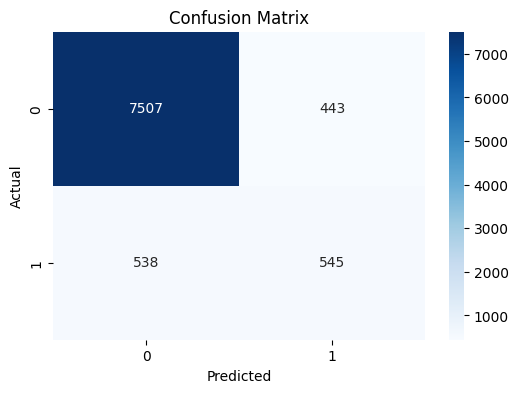

In [88]:
# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
